In [18]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from PIL import Image

# Projeto 1 - Sinais e Sistemas em Tempo Discreto - 2025/02
# Identificação
## Nome: Hércules Natan Dantas de Almeida Medeiros
## Matrícula: 222009760

# Questão 1

## Questão 1a (0.5 pontos)

O objetivo deste exercício é estudar a decimação e a interpolação de sinais. 
Escreva uma função em python que receba um sinal x[n] e retorne um sinal y[n] que seja a decimação por um fator de 2 do sinal de entrada x[n]. 

Em seguida, use a sua função para encontrar o sinal decimado para a entrada: 

$$ x = \left[1, 2, 1, 0, 1, 2, 1, 0, 1, 2, 1, 0, 1, 2, 1, 0, 1, 2, 1, 0 \right]$$

In [19]:
### Código da questão 1a.
def decimacao(x):
    x = np.array(x)
    y = x[::2]
    return y

x = [1, 2, 1, 0, 1, 2, 1, 0, 1, 2, 1, 0, 1, 2, 1, 0, 1, 2, 1, 0]
y = decimacao(x)

print("Sinal original x[n]:", x)
print("Sinal decimado y[n]:", y.tolist())


Sinal original x[n]: [1, 2, 1, 0, 1, 2, 1, 0, 1, 2, 1, 0, 1, 2, 1, 0, 1, 2, 1, 0]
Sinal decimado y[n]: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


## Questão 1b (0.5 pontos)

Escreva uma função em python que receba um sinal y[n] e retorne um sinal z[n] que seja a interpolação por um fator de 2 do sinal de entrada y[n]. A sua função deve aumentar o número de amostras e assinalar um novo valor para as amostras criadas. Você pode escolher se as amostras interpoladas terão o valor médio das amostras ou o valor da amostra anterior. 

Em seguida, utilize a sua função para encontrar o sinal interpolado para o sinal y[n] da questão anterior (1a).


In [20]:
### Código da questão 1b.

def interpolacao(y):
    y = np.array(y)
    tam_n = len(y)
    z = np.zeros(2*tam_n)

    z[::2] = y

    for i in range(tam_n - 1):
        z[2*i + 1] = (y[i] + y[i+1]) / 2

    z[-1] = y[-1]

    return z

y = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
z = interpolacao(y)

print("Sinal y[n]:", y)
print("Sinal interpolado z[n]:", z.tolist())

Sinal y[n]: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Sinal interpolado z[n]: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


## Questão 1c (1 ponto)

Uma imagem é um sinal discreto de duas dimensões. 
Escrevemos I(x,y) para representar esta imagem como uma matriz bidimensional de dimensões (w x h), onde w é a largura da imagem e h a sua altura.

Para imagens, fazemos a decimação e a interpolação separadamente, para todas as linhas e, em seguida, para todas as colunas (ou vice-versa), considerando que cada linha ou coluna é um sinal de uma dimensão.

Aplique o seu algoritmo de decimação sucessivamente até obter uma imagem com tamanho (w/16 x h/16), isto é, aplique o algoritmo 4 vezes seguidas, mostrando a imagem resultante.

Imagem original de tamanho: 512 x 512
Imagem final de tamanho: 32 x 32


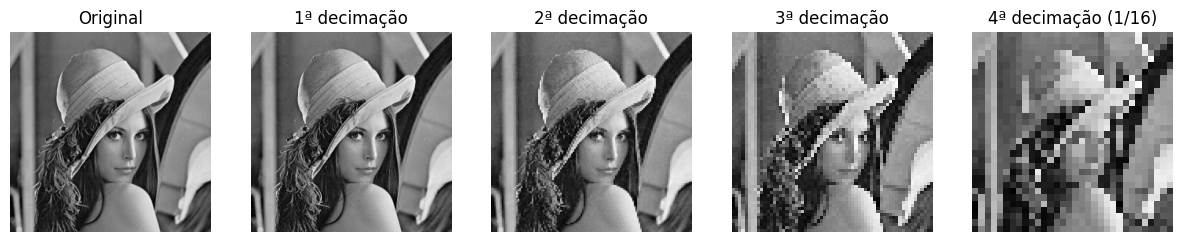

In [21]:
### Código da questão 1c.
im = Image.open("lena.bmp").convert("L")  
A = np.array(im)            
h, w = A.shape
print(f'Imagem original de tamanho: {h} x {w}')
im.show() 

# Função de decimação 2D
def decimacao2D(A):
    return A[::2, ::2]

# Aplicação 4 vezes para obter (h/16 x w/16)
A1 = decimacao2D(A)
A2 = decimacao2D(A1)
A3 = decimacao2D(A2)
A4 = decimacao2D(A3)

print(f"Imagem final de tamanho: {A4.shape[0]} x {A4.shape[1]}")

# Mostrar as imagens 
fig, axs = plt.subplots(1, 5, figsize=(15, 5))
axs[0].imshow(A, cmap='gray'); axs[0].set_title("Original")
axs[1].imshow(A1, cmap='gray'); axs[1].set_title("1ª decimação")
axs[2].imshow(A2, cmap='gray'); axs[2].set_title("2ª decimação")
axs[3].imshow(A3, cmap='gray'); axs[3].set_title("3ª decimação")
axs[4].imshow(A4, cmap='gray'); axs[4].set_title("4ª decimação (1/16)")
for ax in axs: ax.axis('off')
plt.show()


## Questão 1d (1 ponto)

Utilizando como entrada a imagem decimada (de tamanho w/16 x h/16) da questão anterior (1c), aplique o seu algoritmo de interpolação sucessivamente até obter uma imagem com tamanho (w x h), isto é, aplique o algoritmo 4 vezes seguidas, mostrando a imagem resultante. Compare a imagem original com a imagem que foi decimada/interpolada. 

Imagem restaurada: 512 x 512


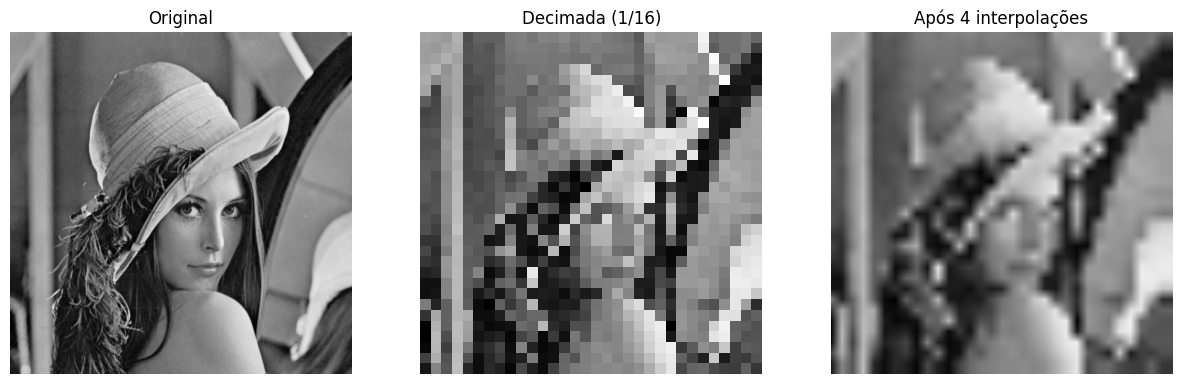

In [22]:
### Código da questão 1d.
def interpolacao2D(A):

    h, w = A.shape
    H, W = 2*h, 2*w
    Z = np.zeros((H, W))

   
    Z[::2, ::2] = A

    # Interpola horizontalmente 
    for i in range(0, H, 2):
        for j in range(1, W-1, 2):
            Z[i, j] = (Z[i, j-1] + Z[i, j+1]) / 2

    # Interpola verticalmente 
    for i in range(1, H-1, 2):
        Z[i, :] = (Z[i-1, :] + Z[i+1, :]) / 2

    # Últimas linhas/colunas 
    Z[-1, :] = Z[-2, :]
    Z[:, -1] = Z[:, -2]

    return Z

A_dec = A4

# Aplicar interpolação 4 vezes
A_i1 = interpolacao2D(A_dec)
A_i2 = interpolacao2D(A_i1)
A_i3 = interpolacao2D(A_i2)
A_i4 = interpolacao2D(A_i3)

print(f"Imagem restaurada: {A_i4.shape[0]} x {A_i4.shape[1]}")

fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].imshow(A, cmap='gray'); axs[0].set_title("Original")
axs[1].imshow(A_dec, cmap='gray'); axs[1].set_title("Decimada (1/16)")
axs[2].imshow(A_i4, cmap='gray'); axs[2].set_title("Após 4 interpolações")
for ax in axs: ax.axis('off')
plt.show()


# Questão 2

Considere o seguinte sistema LDIT:
$$ y\left[n+2\right] + \frac{1}{6}y\left[n\right] = x\left[n+2\right] + 2x\left[n+1\right]+x\left[n\right] $$
$$ x\left[n\right] = \left(\frac{1}{4}\right)^n u\left[n\right] $$
$$ y\left[-1\right] = y\left[-2\right] = 0 $$

## Questão 2a (1 ponto)

Determine a resposta ao impulso h[n] analiticamente. Você pode inserir a sua resposta escaneada como uma imagem abaixo.

In [23]:
### Código da questão 2a.

## Questão 2b (1 ponto)
Escreva um código para obter a resposta ao impulso h[n] iterativamente. Compare a resposta obtida iterativamente com a resposta analítica para as primeiras 100 amostras, plotando o gráfico das duas respostas.

Calcule também o erro médio quadrático entre os dois sinais, h[n] analítico e g[n] iterativo, através da equação:

$$ MSE = \frac{1}{N} \sum_{i=0}^{N-1} \left( h\left[i\right] - g\left[i\right] \right)^2 $$

onde N é o número de amostras considerado (no caso, 100 amostras).

Erro médio quadrático (MSE) = 0.000000000000


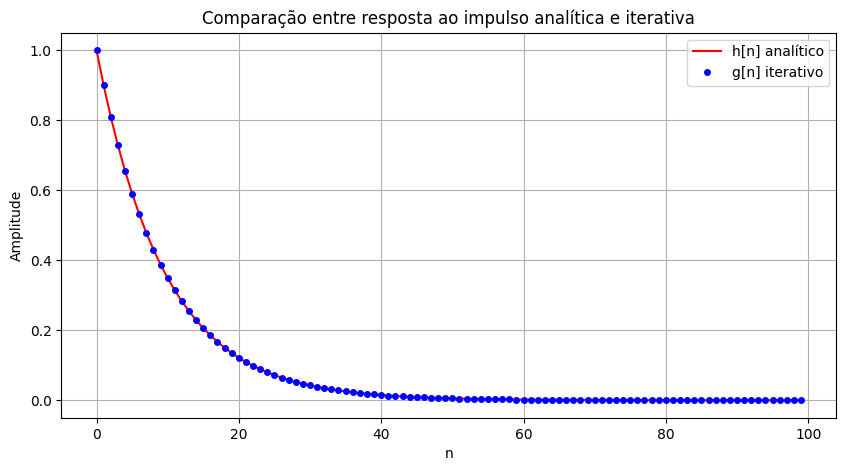

In [24]:
### Código da questão 2b.

N = 100       # número de amostras
a = 0.9     # coeficiente do sistema

n = np.arange(N)
h_analitico = (a ** n)   # Fórmula: h[n] = (0.9)^n * u[n]


h_iterativo = np.zeros(N)
x = np.zeros(N)
x[0] = 1  

for i in range(N):
    if i == 0:
        h_iterativo[i] = x[i]
    else:
        h_iterativo[i] = a * h_iterativo[i-1] + x[i]


MSE = np.mean((h_analitico - h_iterativo) ** 2)
print(f"Erro médio quadrático (MSE) = {MSE:.12f}")


plt.figure(figsize=(10,5))
plt.plot(n, h_analitico, 'r-', label='h[n] analítico')
plt.plot(n, h_iterativo, 'bo', markersize=4, label='g[n] iterativo')
plt.title('Comparação entre resposta ao impulso analítica e iterativa')
plt.xlabel('n')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()


## Questão 2c (1 ponto)

Determine a resposta do sistema às condições iniciais dadas analiticamente. Você pode inserir a sua resposta escaneada como uma imagem abaixo.

In [25]:
### Código da questão 2c.

### Questão 2d (1 ponto)
Escreva um programa para obter a resposta do sistema através da convolução da entrada com a resposta ao impulso h[n] truncada para as primeiras 20 amostras (isto é, considerando apenas as primeiras 20 amostras de h[n]).

Compare a resposta obtida pela convolução com a resposta obtida analiticamente, plotando o gráfico das duas respostas (calcule as primeiras 100 amostras do sinal). Calcule também o erro médio quadrático entre os dois sinais.

Erro médio quadrático (MSE) = 12.621686


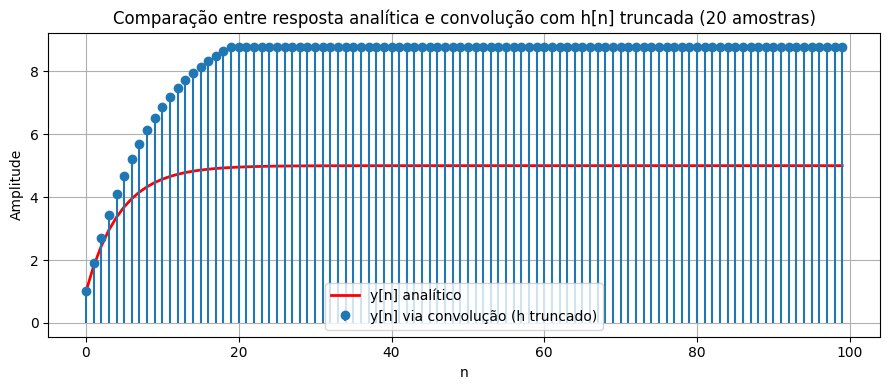

In [26]:
 
L = 20 

n = np.arange(N)
h_analitico = (0.9 ** n)  # exemplo h[n] = (0.9)^n * u[n]


h_trunc = h_analitico[:L]

x = np.ones(N)


y_conv = np.convolve(x, h_trunc)[:N]  


y_analitico = (1 - (0.8) ** (n + 1)) / (1 - 0.8)

MSE = np.mean((y_analitico - y_conv)**2)
print(f"Erro médio quadrático (MSE) = {MSE:.6f}")

# --- Plotagem ---
plt.figure(figsize=(9,4))
plt.plot(n, y_analitico, 'r-', linewidth=2, label='y[n] analítico')
plt.stem(n, y_conv, linefmt='C0-', markerfmt='C0o', basefmt=" ", label='y[n] via convolução (h truncado)')
plt.xlabel('n')
plt.ylabel('Amplitude')
plt.title('Comparação entre resposta analítica e convolução com h[n] truncada (20 amostras)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## Questão 2e (1 ponto)

Usando como entrada o sinal disponibilizado ('data_projeto1.mat'), determine a resposta do sistema. Plote o gráfico da entrada e da saída do sistema. 

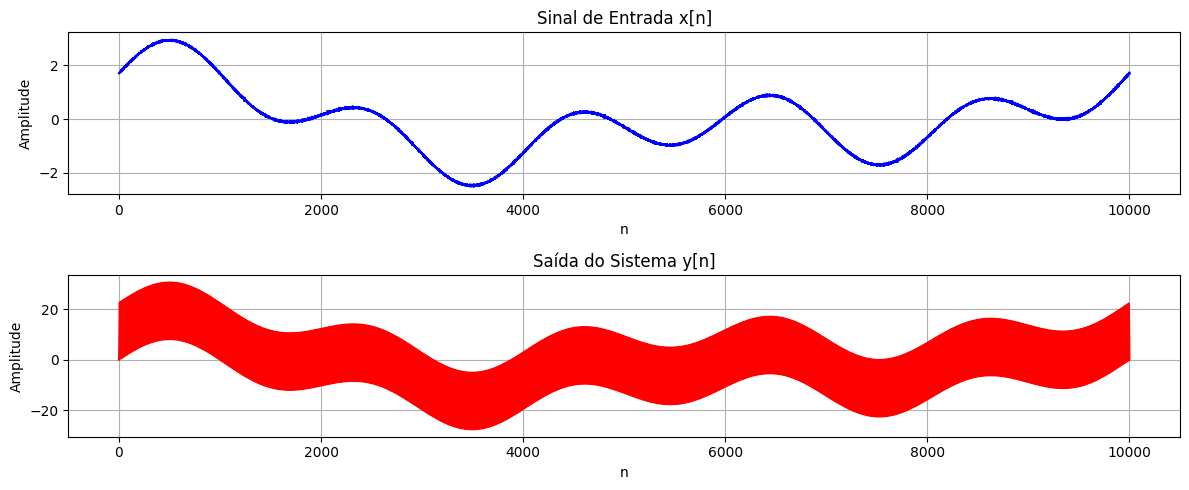

In [27]:
### Códgio da Questão 2e
sinal = sp.io.loadmat('data_projeto1.mat')['sinal'].ravel()
N = len(sinal)
y = np.zeros(N)
w0 = np.pi / 8


for n in range(N - 2):
    y[n + 2] = 2 * np.cos(w0) * y[n + 1] - y[n] + sinal[n]


plt.figure(figsize=(12,5))

plt.subplot(2,1,1)
plt.plot(sinal, color='blue')
plt.title('Sinal de Entrada x[n]')
plt.xlabel('n')
plt.ylabel('Amplitude')
plt.grid(True)

plt.subplot(2,1,2)
plt.plot(y, color='red')
plt.title('Saída do Sistema y[n]')
plt.xlabel('n')
plt.ylabel('Amplitude')
plt.grid(True)

plt.tight_layout()
plt.show()


# Questão 3
Considere o seguinte sistema LDIT:
$$ y\left[n+2\right] -2~\cos \left( \frac{\pi}{8} \right) y\left[n+1\right] + y\left[n\right] = x\left[n\right] $$

## Questão 3a (1 ponto)
Determine a resposta ao impulso h[n] analiticamente. Você pode inserir a sua resposta escaneada como uma imagem abaixo.

In [28]:
### Código da questão 3a

## Questão 3b (1 ponto)
Escreva um programa para obter a resposta ao impulso h[n] iterativamente. Compare a resposta obtida com a resposta analítica, plotando o gráfico das duas respostas para as primeiras 100 amostras. Calcule também o erro médio quadrático entre os dois sinais.

Erro médio quadrático (MSE) = 1.999900009999e+00


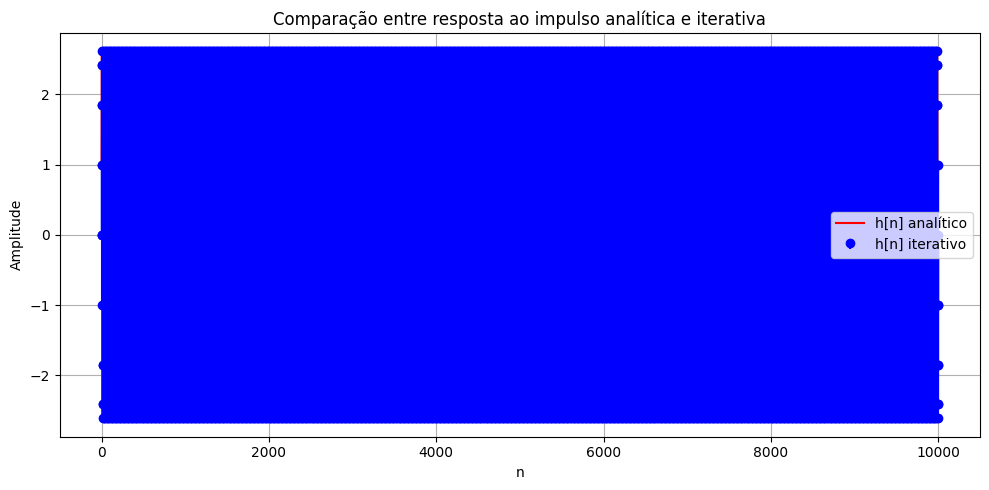

In [29]:
### Código da questão 3b
w0 = np.pi / 8

x = np.zeros(N)
x[0] = 1

y = np.zeros(N)

for n in range(N - 2):
    y[n + 2] = 2 * np.cos(w0) * y[n + 1] - y[n] + x[n]

h_iterativo = y.copy()

n = np.arange(N)
h_analitico = np.sin(w0 * (n + 1)) / np.sin(w0)
h_analitico[n < 0] = 0 

MSE = np.mean((h_iterativo - h_analitico) ** 2)
print(f"Erro médio quadrático (MSE) = {MSE:.12e}")


plt.figure(figsize=(10,5))
plt.plot(n, h_analitico, 'r-', label='h[n] analítico')
plt.stem(n, h_iterativo, linefmt='b-', markerfmt='bo', basefmt=' ', label='h[n] iterativo')
plt.title('Comparação entre resposta ao impulso analítica e iterativa')
plt.xlabel('n')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()